First of all, we import the libraries and read the data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer

sns.set_theme()

In [39]:
lloguer = pd.read_csv("2017_lloguer_preu_trim.csv")
lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [40]:
poblacio = pd.read_csv("2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv")
poblacio.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [41]:
accidents = pd.read_csv("2017_accidents_causa_conductor_gu_bcn_.csv")
accidents.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Desconegut,-1,Desconegut,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1,2017S007937,-1,Desconegut,-1,Desconegut,-1,Joan XXIII / Martí i Franquès ...,NaN,Dimarts,2017,9,Setembre,26,9,Gir indegut o sense precaució,Matí,426505.49,4581655.96,2.199239,41.419635
2,2017S004739,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,900,Dilluns,2017,5,Maig,29,22,Manca d'atenció a la conducció,Nit,432587.59,4584475.05,2.186875,41.412198
3,2017S008779,-1,Desconegut,-1,Desconegut,-1,Número 6 Zona Franca / A Zona Franca ...,NaN,Dilluns,2017,10,Octubre,23,22,Desobeir altres senyals,Nit,427519.99,4575229.36,2.190955,41.406769
4,2017S004350,-1,Desconegut,-1,Desconegut,-1,Aguilar ...,7-9,Dimarts,2017,5,Maig,16,14,Altres,Tarda,430758.19,4586316.94,2.186557,41.409004


In [42]:
lloguer["Codi_Barri"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73], dtype=int64)

In [43]:
poblacio["Codi_Barri"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73], dtype=int64)

In [44]:
accidents["Codi_barri"].unique()

array([-1, 64, 65, 72, 70, 73, 71, 68, 69, 66, 67,  1,  2,  4,  3, 10,  9,
        8,  7,  6, 11,  5, 12, 13, 15, 16, 14, 18, 17, 19, 20, 26, 21, 23,
       25, 24, 27, 22, 28, 30, 31, 29, 32, 38, 39, 41, 42, 40, 36, 43, 34,
       37, 35, 33, 54, 49, 48, 53, 50, 52, 44, 45, 51, 46, 63, 59, 60, 57,
       62, 61, 58, 47, 56, 55], dtype=int64)

In [45]:
# We left join the "lloguer" dataset with the "poblacio" dataset
df = pd.merge(lloguer, poblacio, on=['Nom_Districte', 'Nom_Barri', 'Codi_Districte', 'Codi_Barri'], how='left')

In [46]:
df.shape

(151840, 11)

In [47]:
df.tail()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
151835,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,60-65 dB,0.00%
151836,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,65-70 dB,0.00%
151837,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,70-75 dB,0.00%
151838,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,75-80 dB,0.00%
151839,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38,PARCS_D,>=80 dB,0.00%


In [48]:
# As we can see, we have a hight number of missing values in the "Preu" variablethat we will have to handle
nans_df = pd.DataFrame(df.isna().sum()).reset_index()
nans_df = nans_df.rename(columns={"index": "Feature",  0: "Missing values"})
nans_df

,Feature,Missing values
0,Any,0
1,Trimestre,0
2,Codi_Districte,0
3,Nom_Districte,0
4,Codi_Barri,0
5,Nom_Barri,0
6,Lloguer_mitja,0
7,Preu,9880
8,Concepte,0
9,Rang_soroll,0


In [49]:
# Okay, let's try to understand why we have missing values
df[df['Preu'].isna()].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
2860,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN,TOTAL_D,<40 dB,0.96%
2861,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN,TOTAL_D,40-45 dB,6.25%
2862,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN,TOTAL_D,45-50 dB,29.19%
2863,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN,TOTAL_D,50-55 dB,29.80%
2864,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN,TOTAL_D,55-60 dB,23.02%


<!-- # Create a k-NN imputer
knn_imputer = KNNImputer(n_neighbors=3)  -->

<!-- # Apply the imputer to the entire DataFrame
imputed_data = knn_imputer.fit_transform(df) -->

<!-- # Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_data, columns=df.columns) -->

In [50]:
# Drop rows containing any NaN values
df = df.dropna(how='any')

##### Exploratory Data Analisis

##### Univariant Analisis

In [51]:
def plot_countplot(data, column, title='', xlabel='', ylabel='', figsize=(24, 18), horizontal=False):
    """
    Create a countplot using Seaborn.

    Parameters:
    - data: DataFrame containing the data to be plotted.
    - column: Name of the column to be counted and plotted.
    - title: Title of the plot (optional).
    - xlabel: Label for the x-axis (optional).
    - ylabel: Label for the y-axis (optional).
    - figsize: Figure size (optional).
    - horizontal: If True, create a horizontal countplot (default is False).

    Returns:
    - None (displays the plot).
    """
    plt.figure(figsize=figsize)
    if horizontal:
        sns.countplot(y=column, data=data)
    else:
        sns.countplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

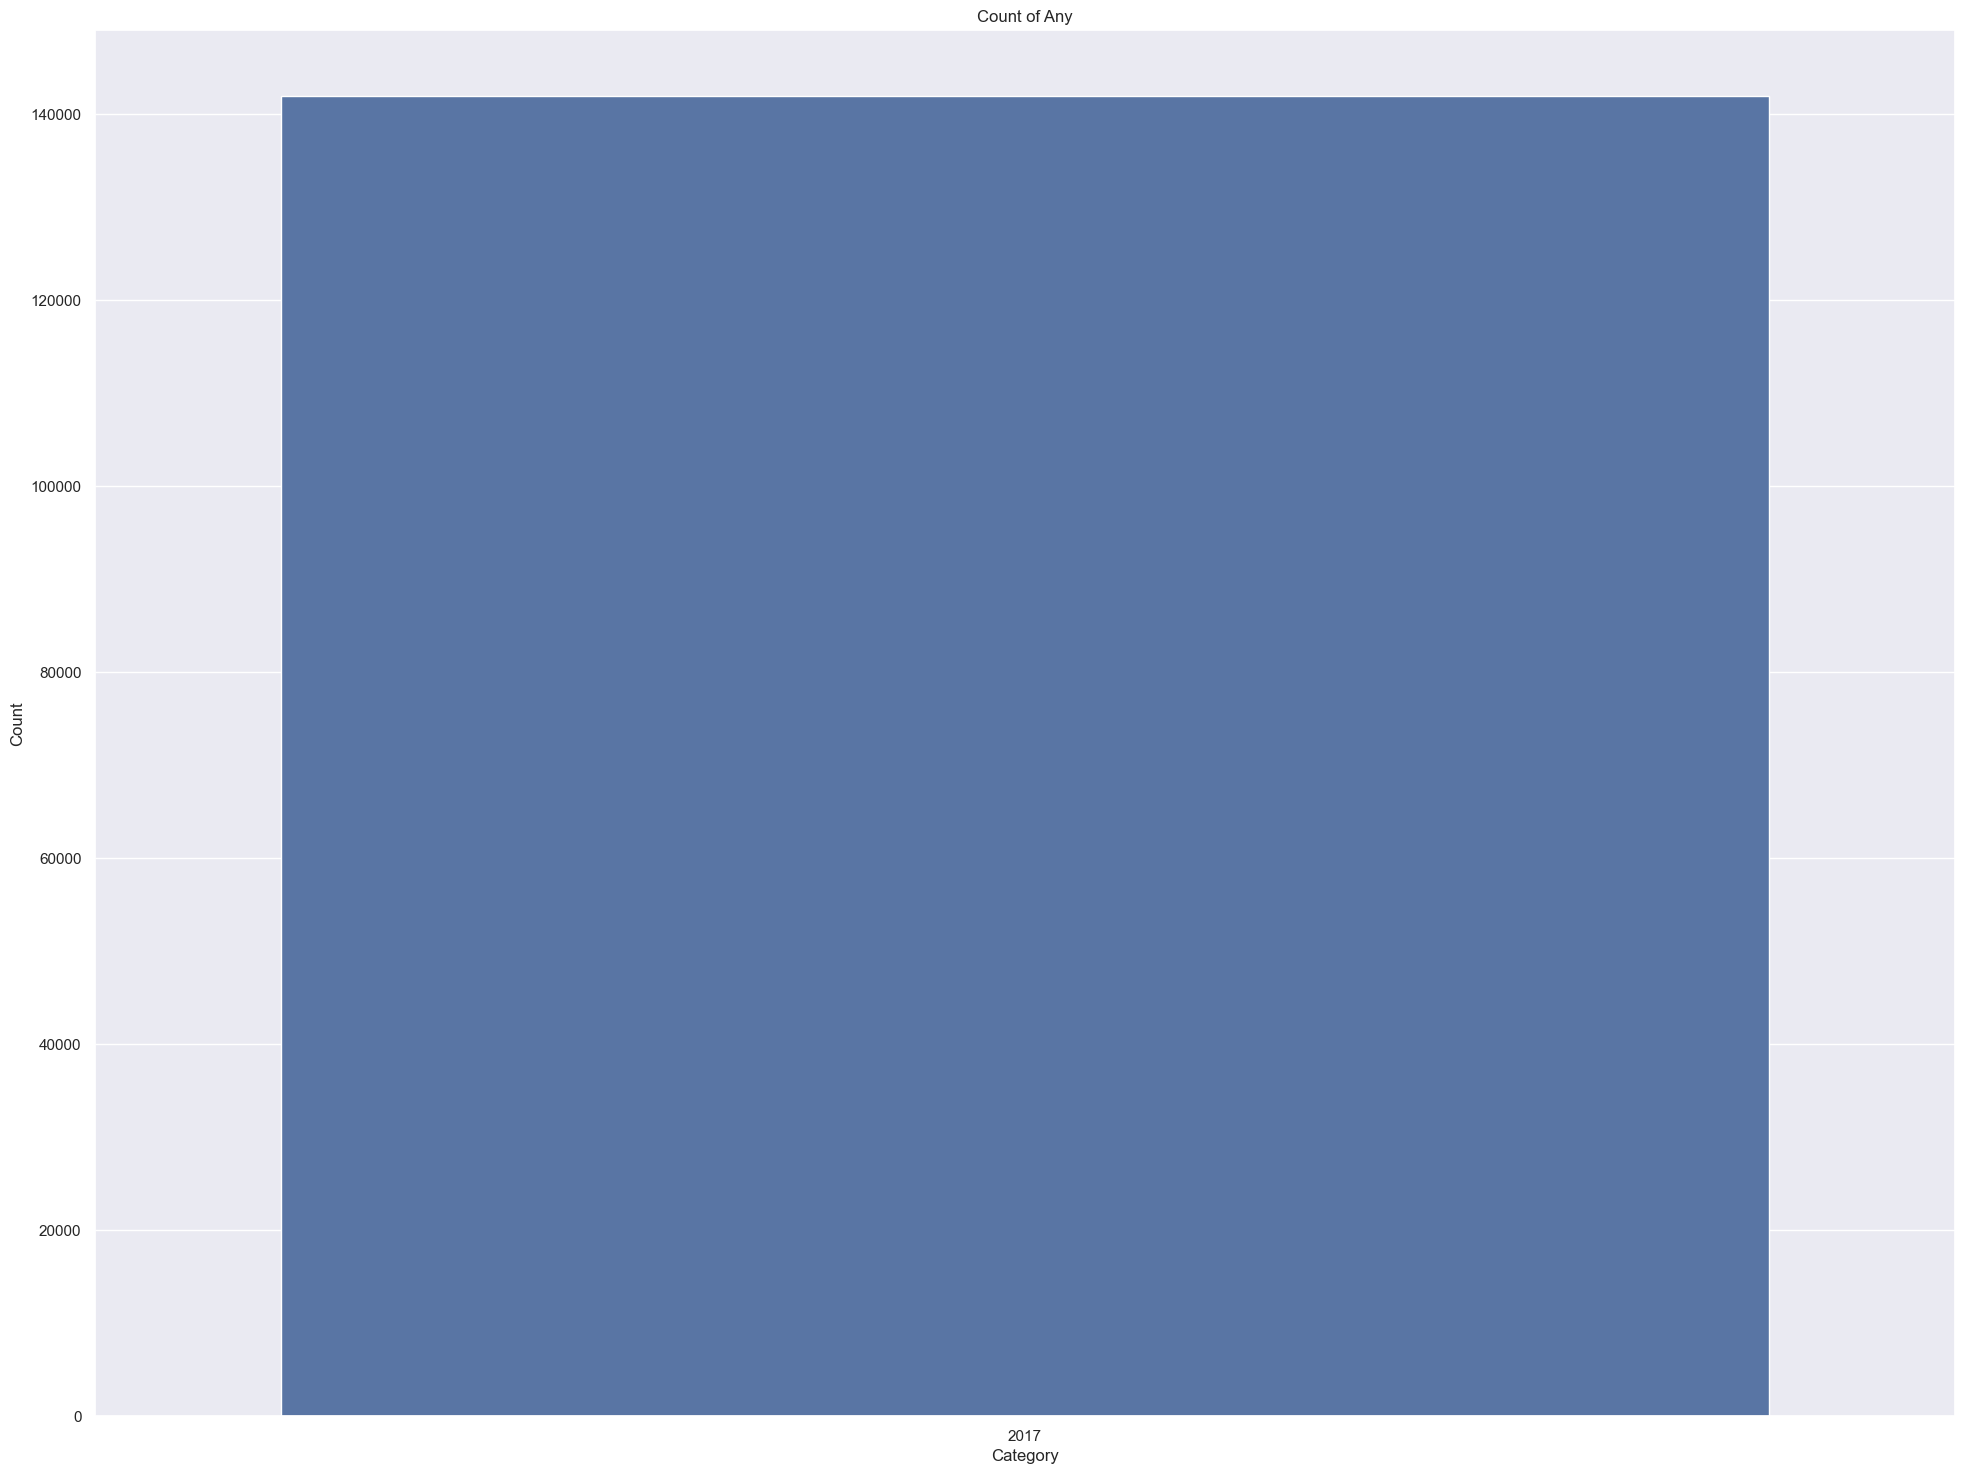

In [52]:
# Call the function to create the countplot
plot_countplot(df, column='Any', title='Count of Any', xlabel='Category', ylabel='Count')

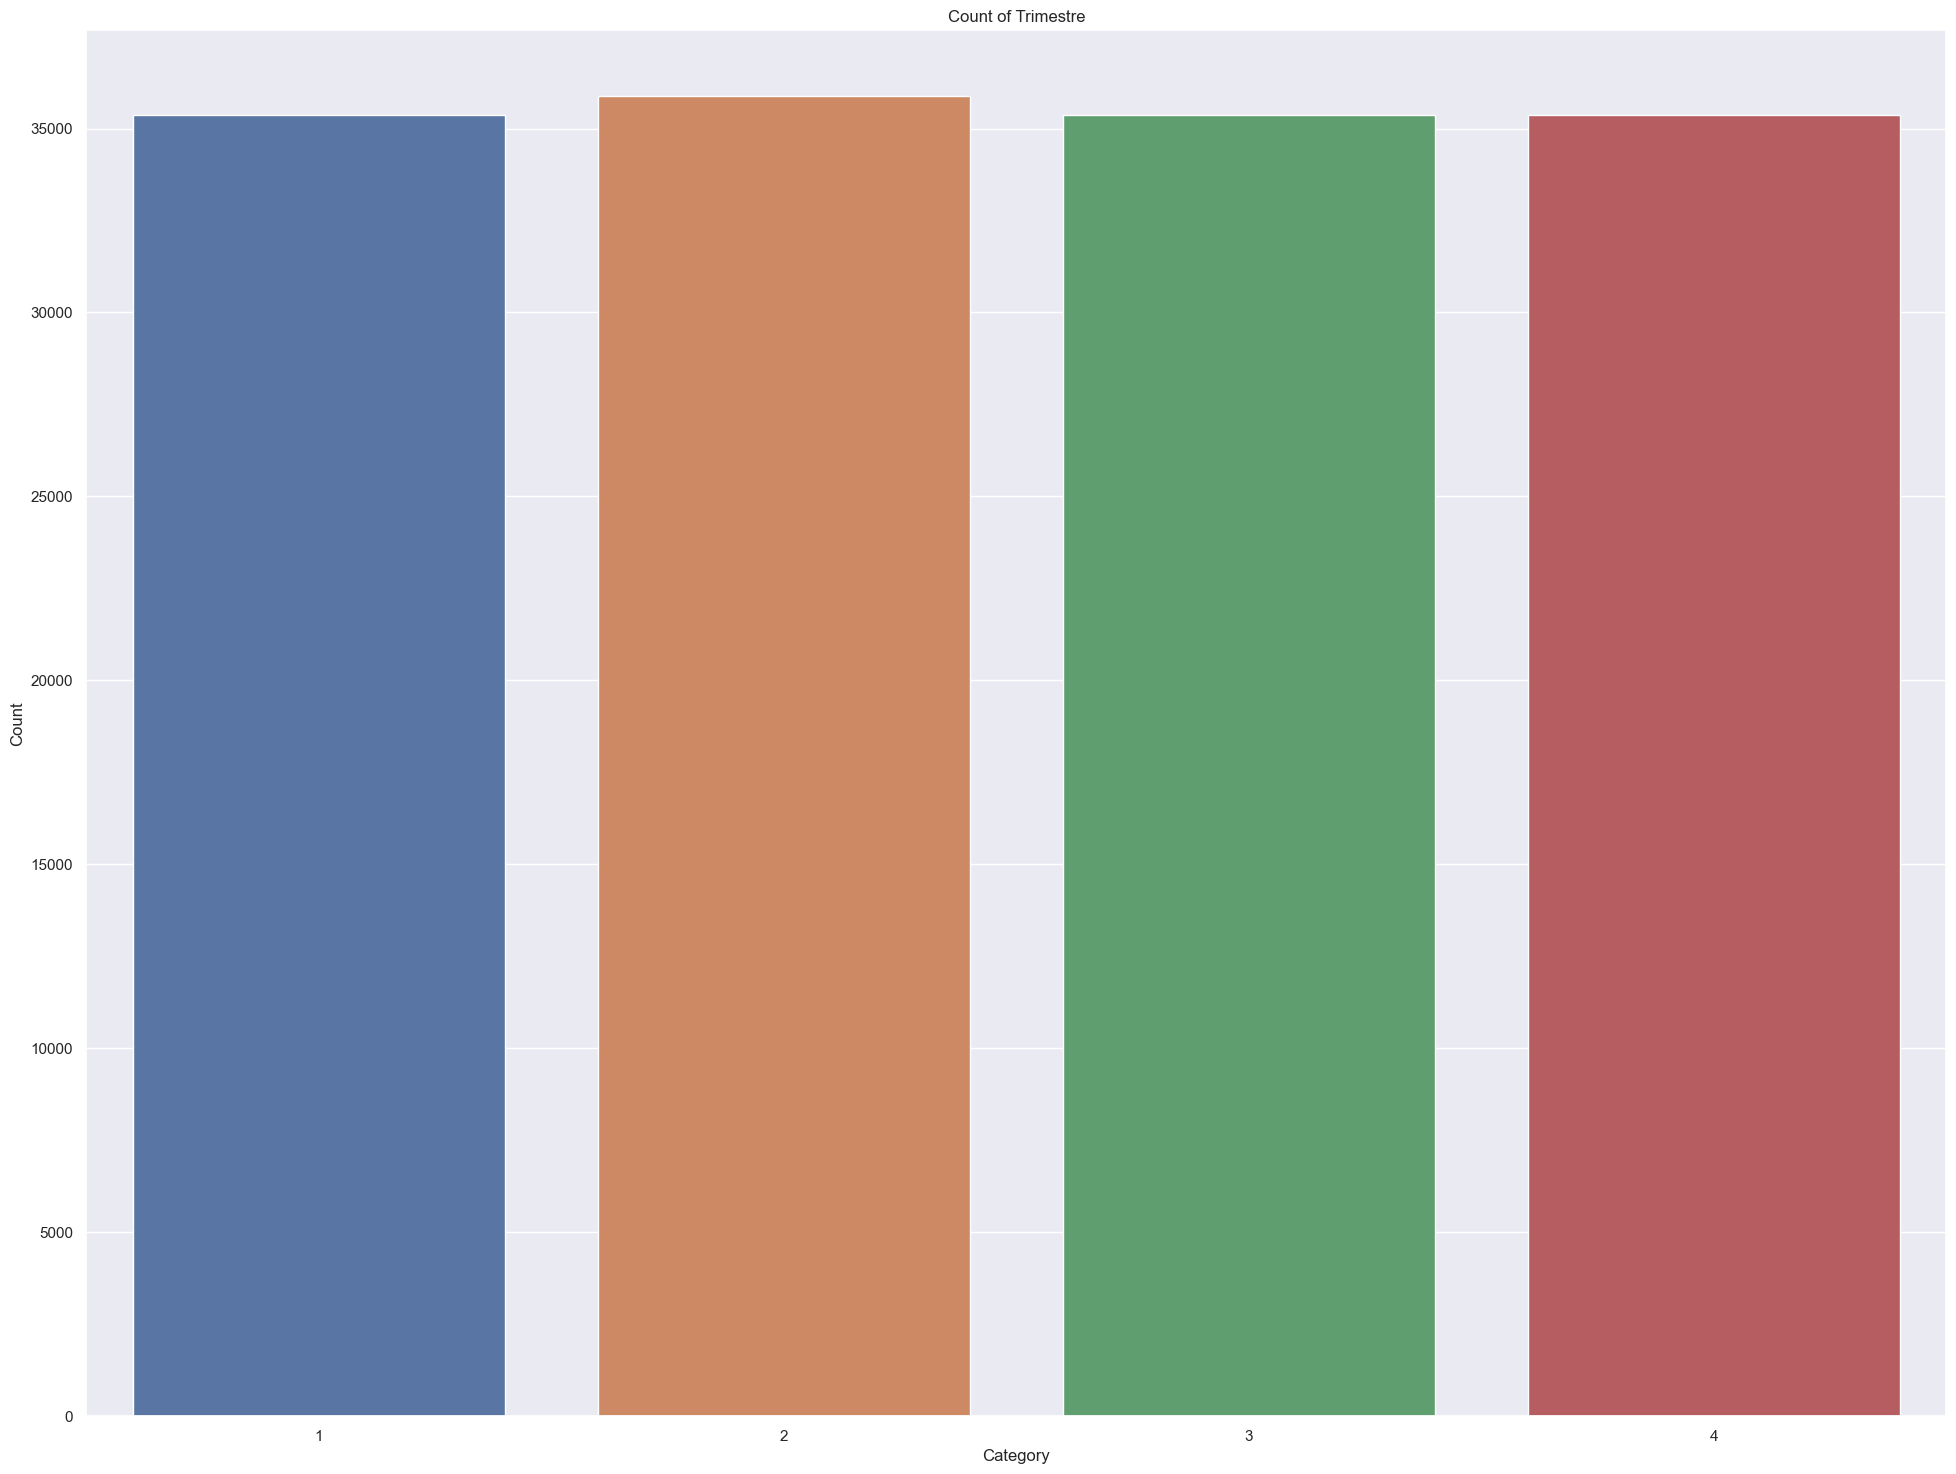

In [53]:
# Call the function to create the countplot
plot_countplot(df, column='Trimestre', title='Count of Trimestre', xlabel='Category', ylabel='Count')

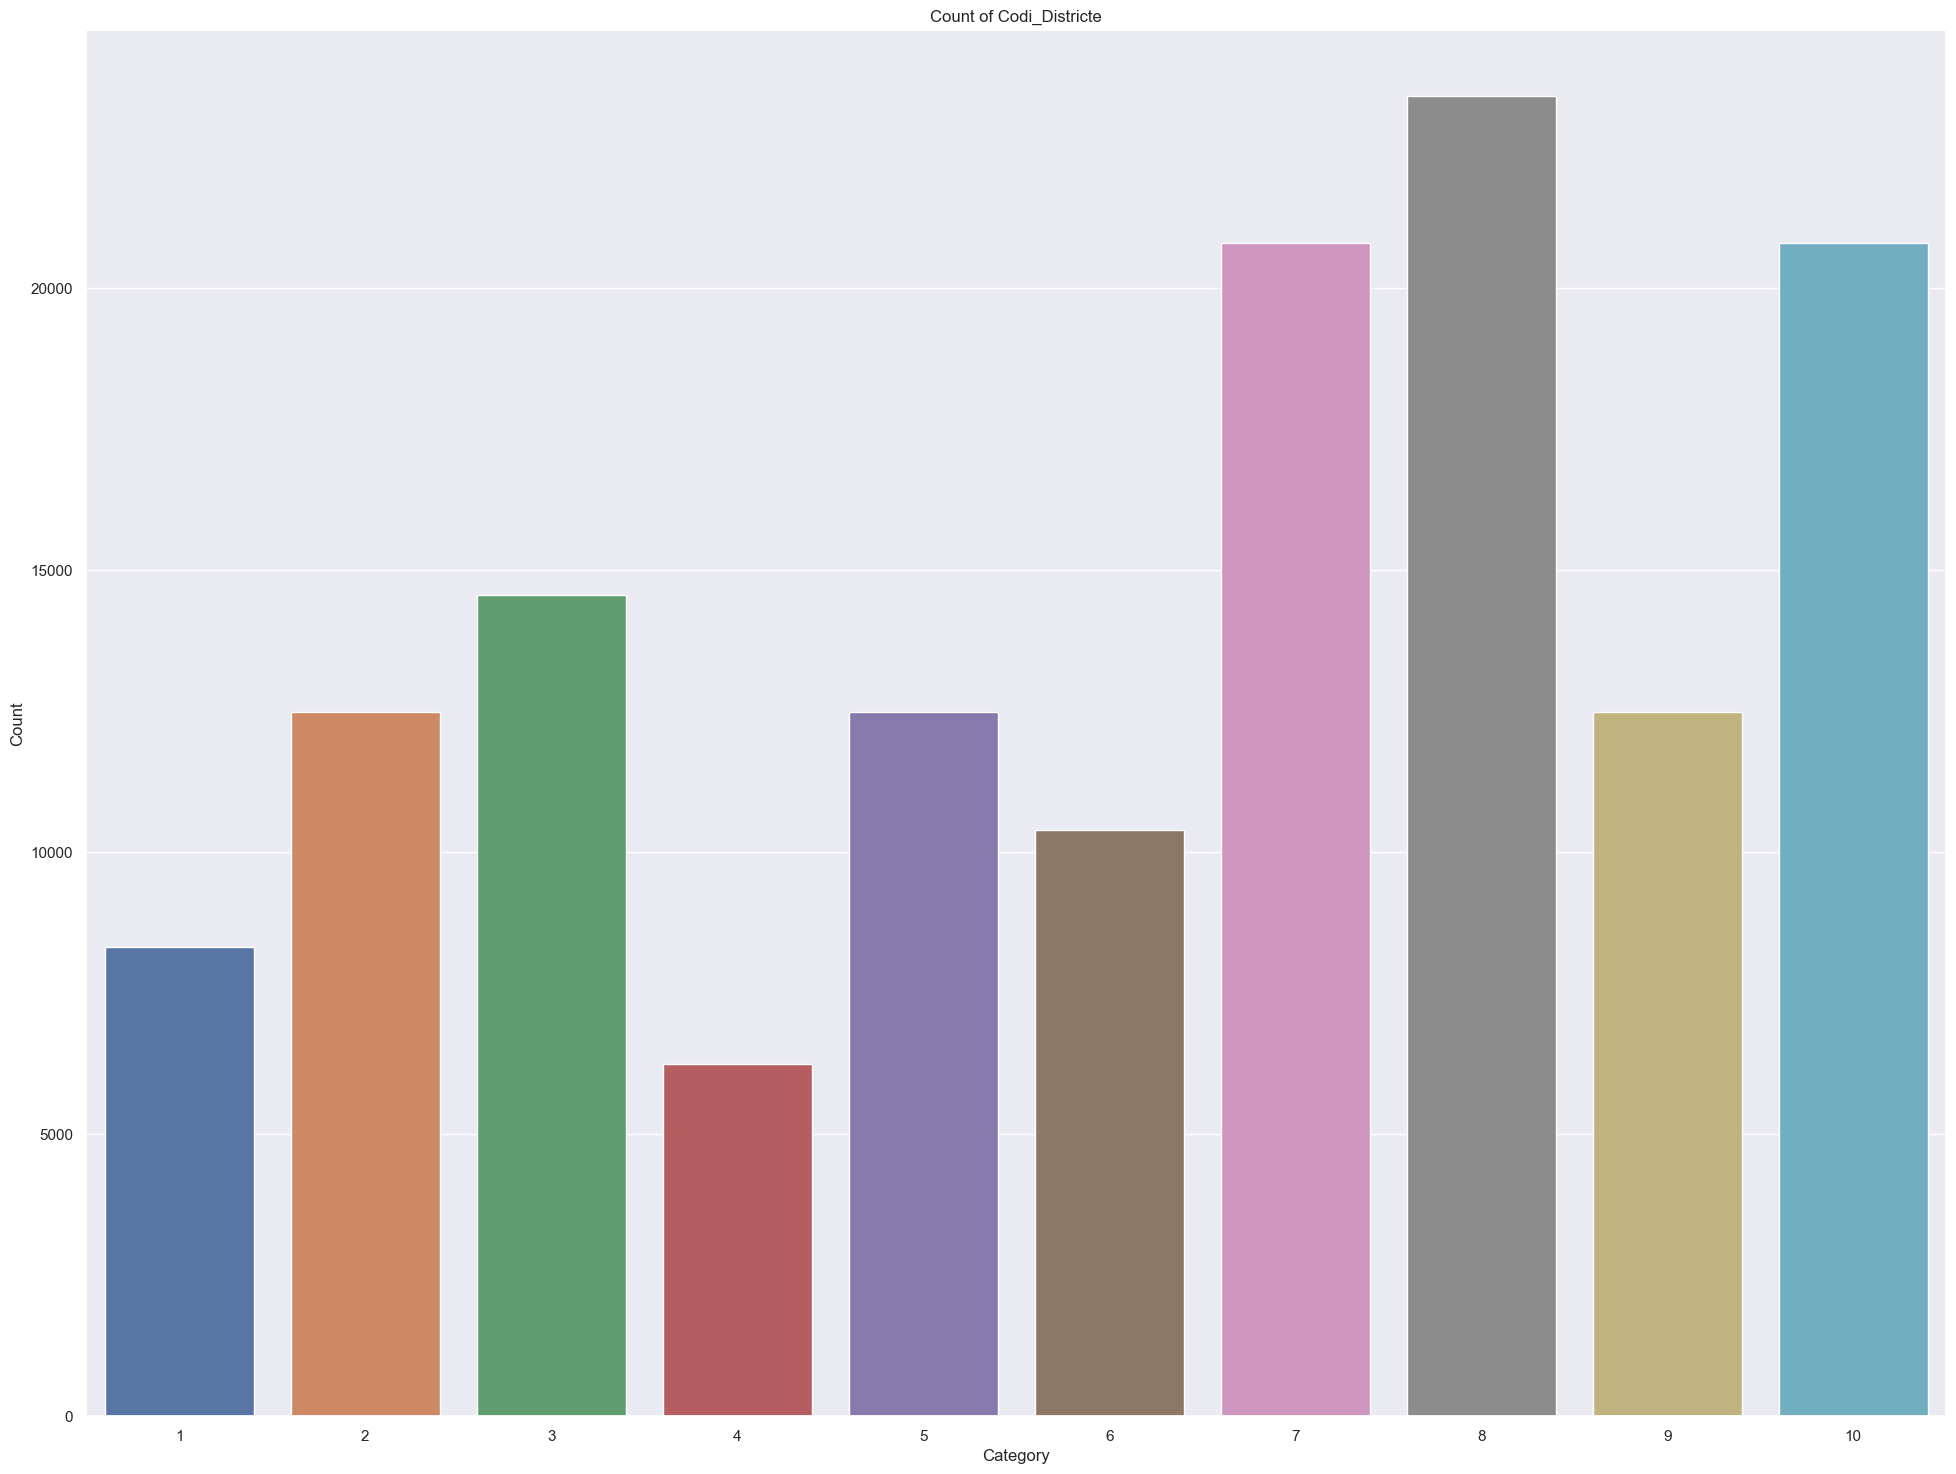

In [54]:
# Call the function to create the countplot
plot_countplot(df, column='Codi_Districte', title='Count of Codi_Districte', xlabel='Category', ylabel='Count')

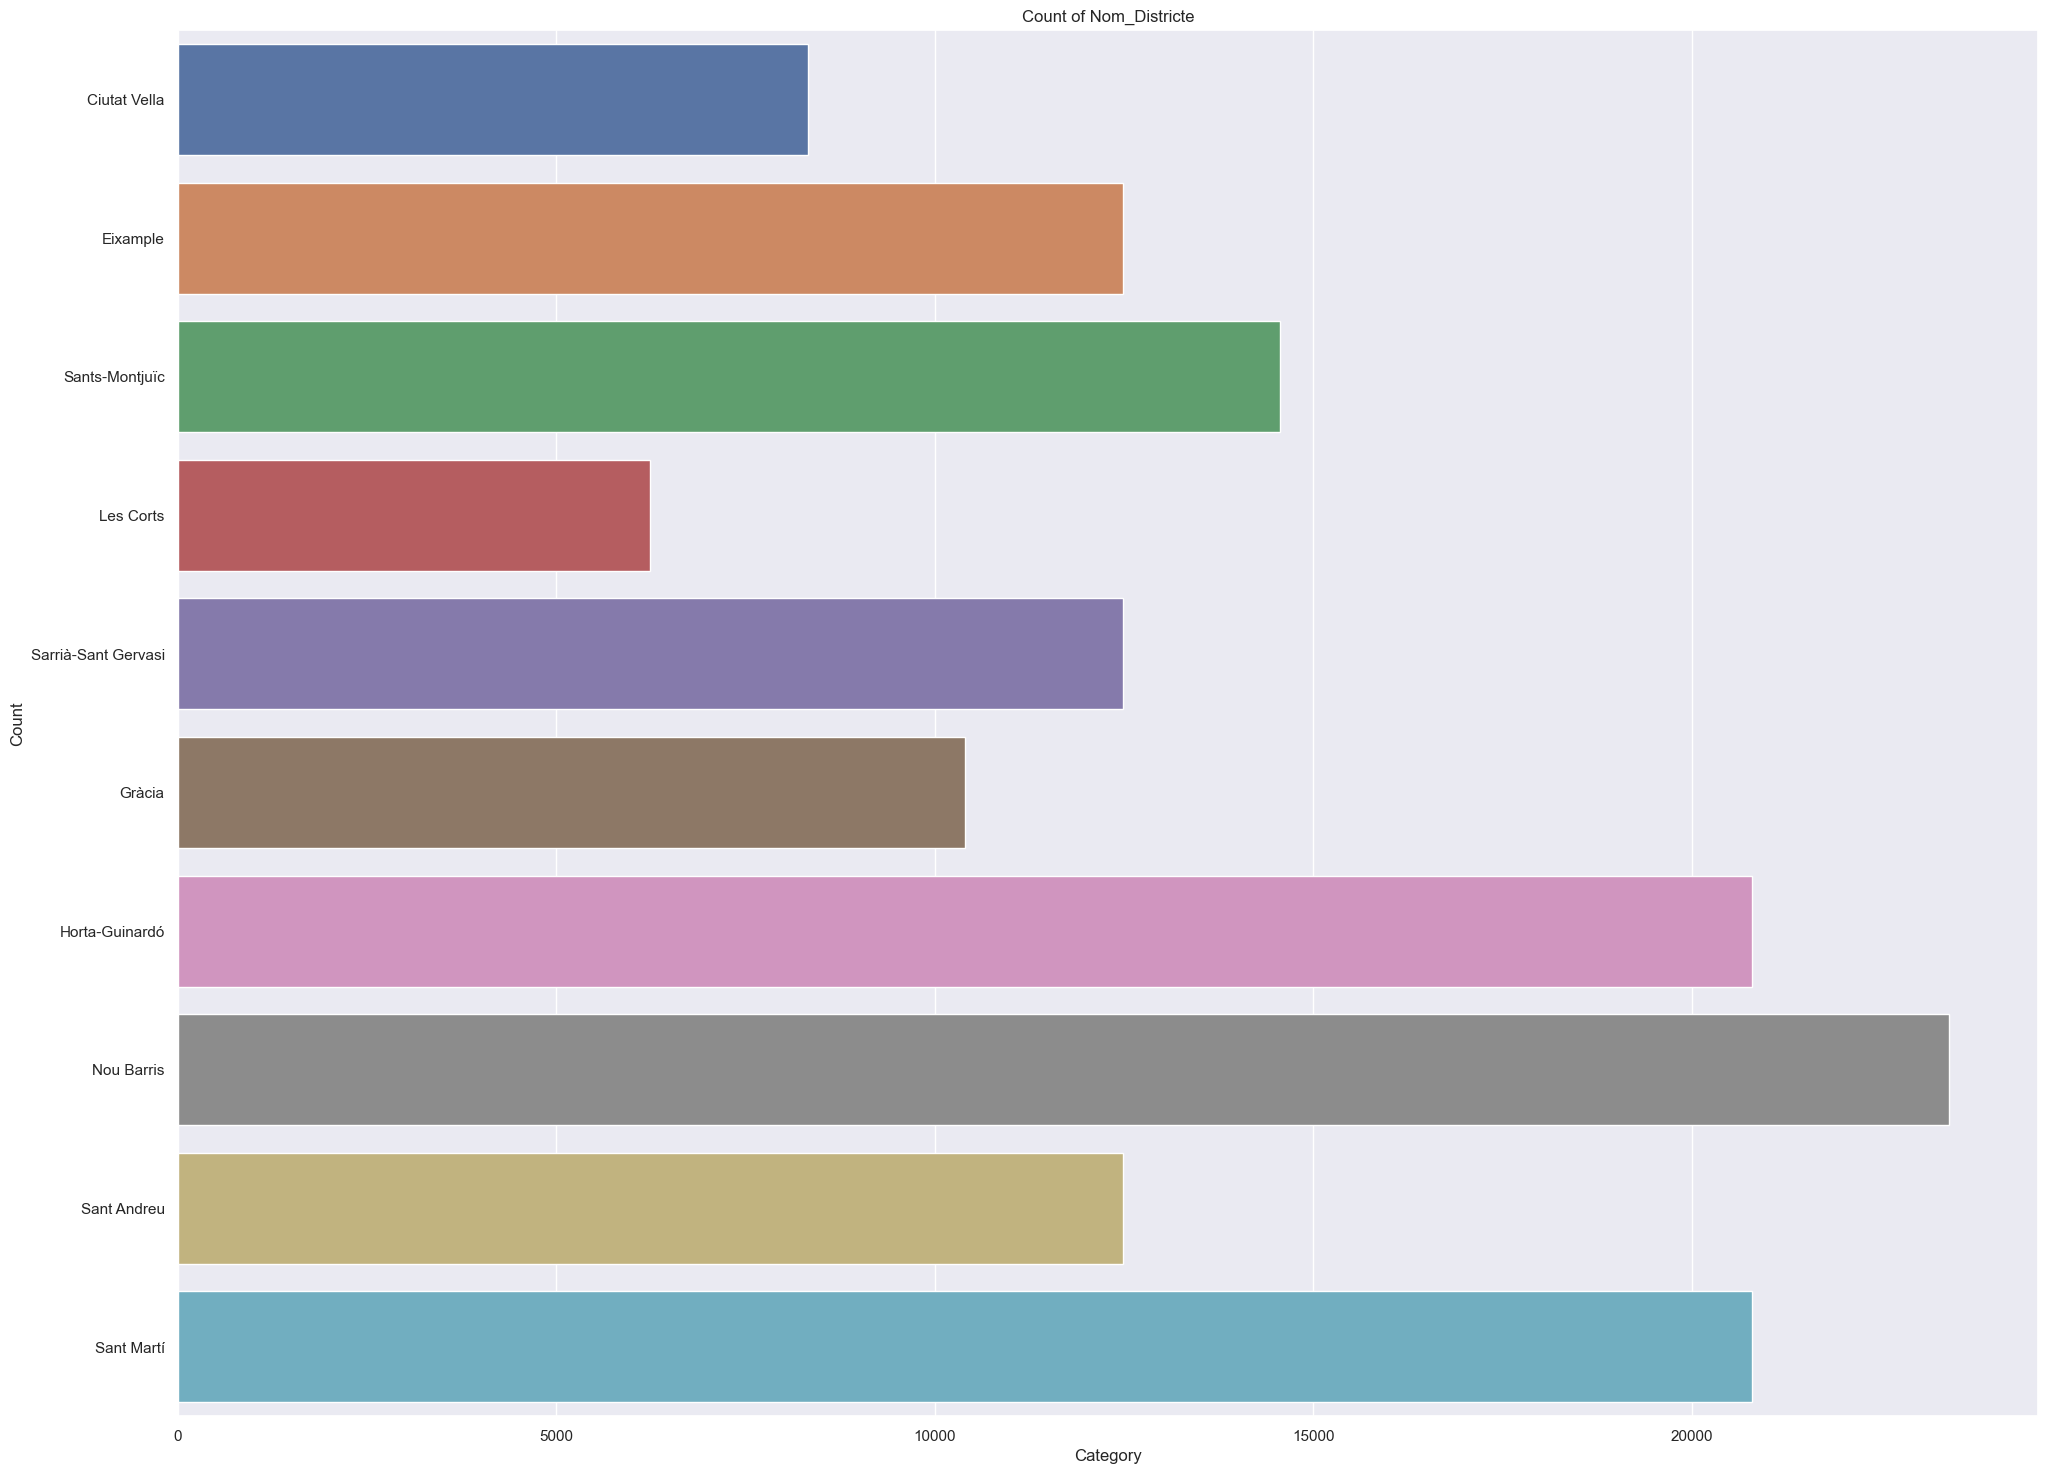

In [55]:
# Call the function to create the countplot
plot_countplot(df, column='Nom_Districte', title='Count of Nom_Districte', xlabel='Category', ylabel='Count', horizontal=True)

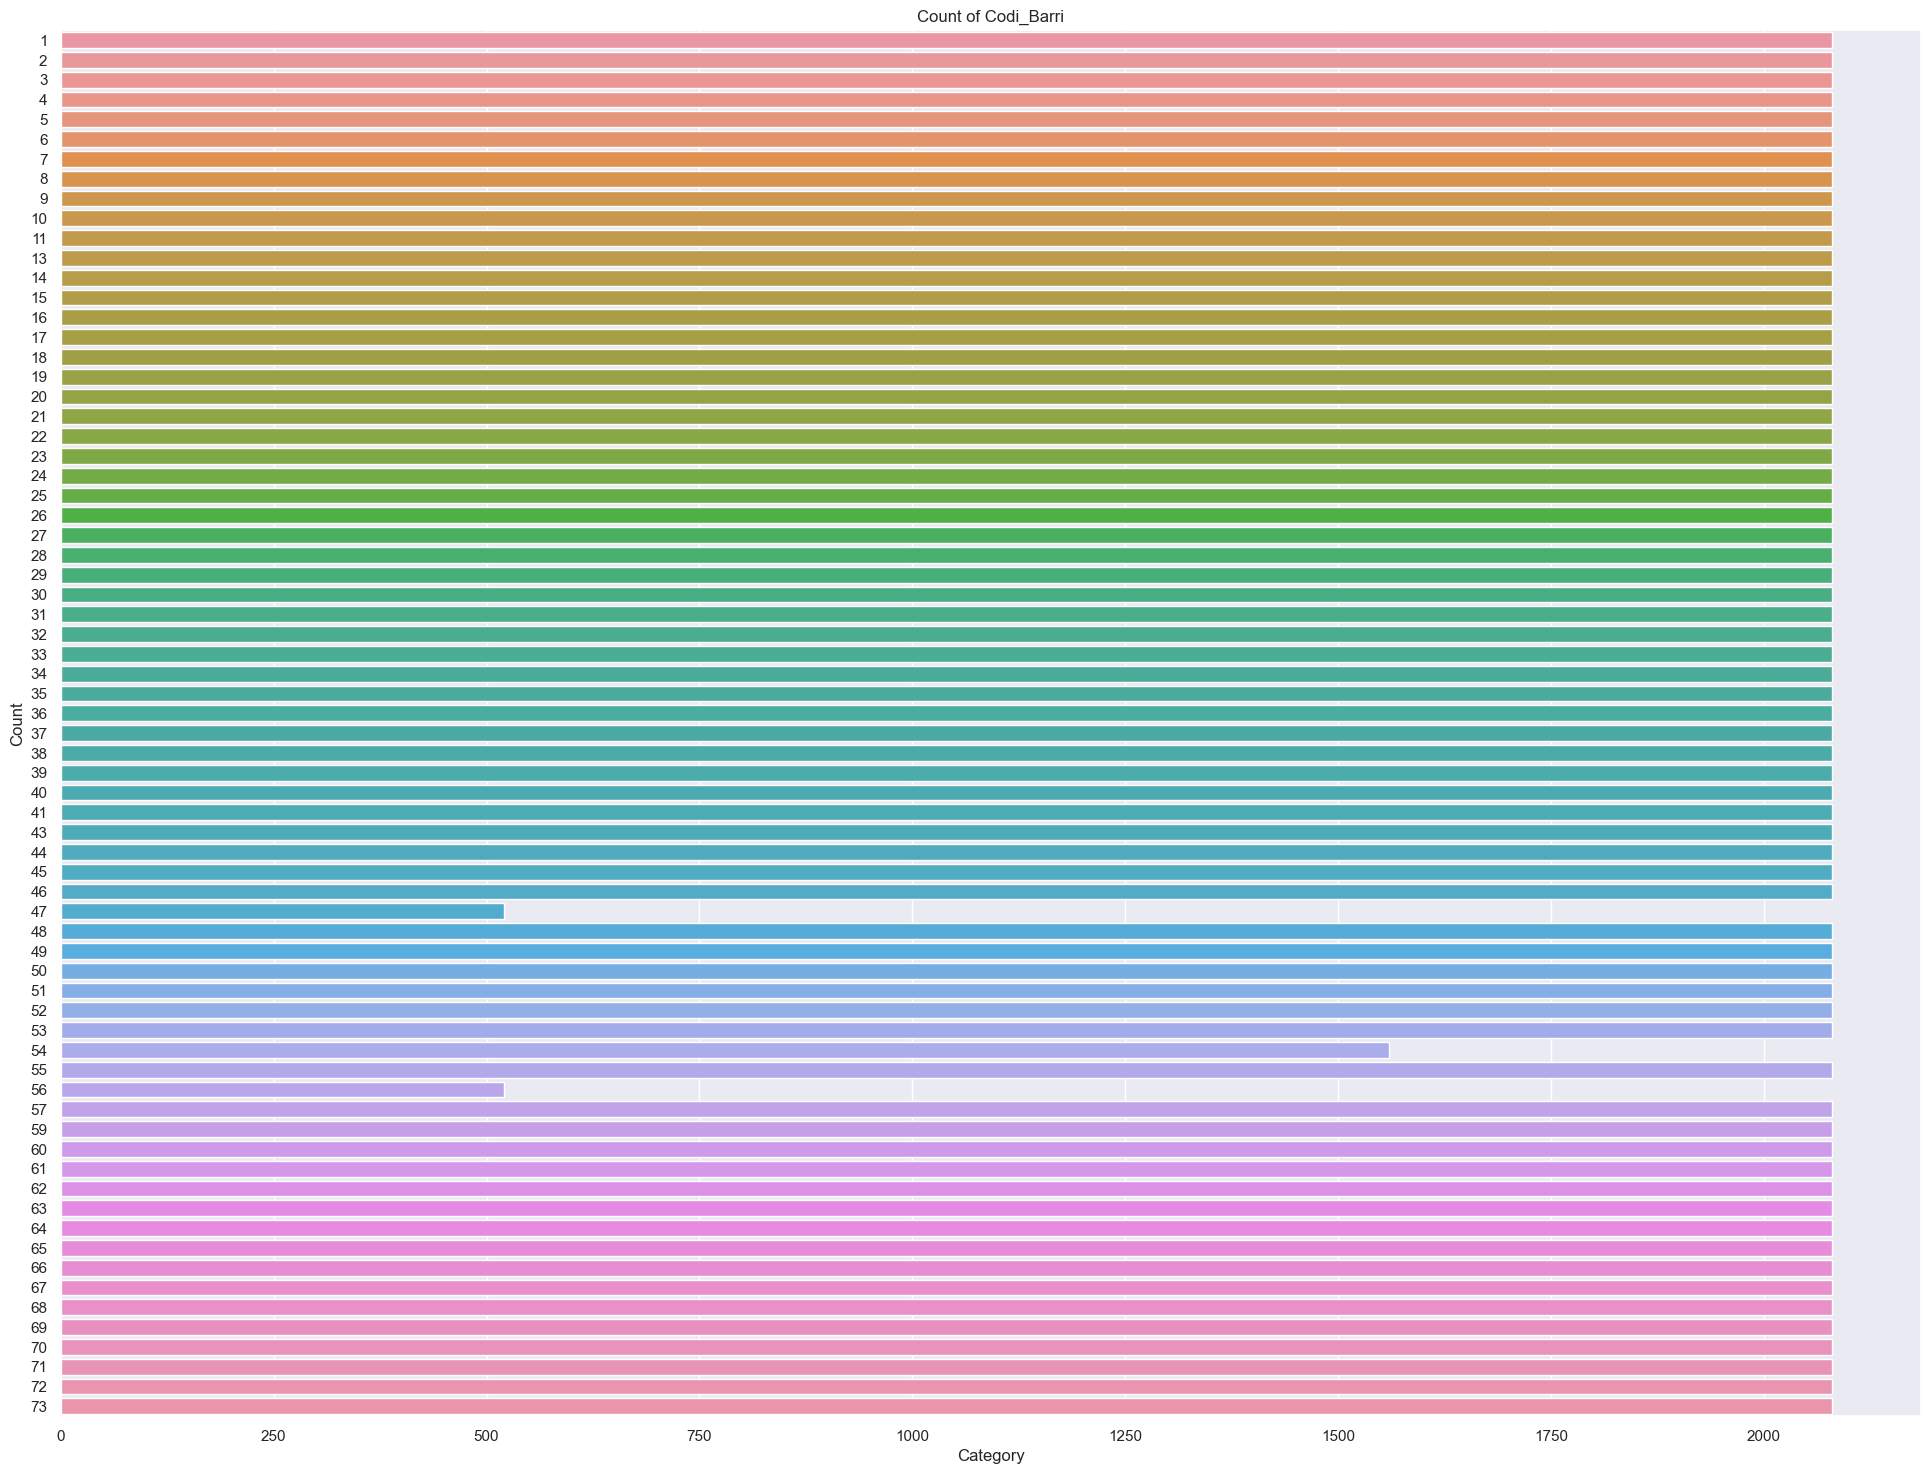

In [56]:
# Call the function to create the countplot
plot_countplot(df, column='Codi_Barri', title='Count of Codi_Barri', xlabel='Category', ylabel='Count', horizontal=True)

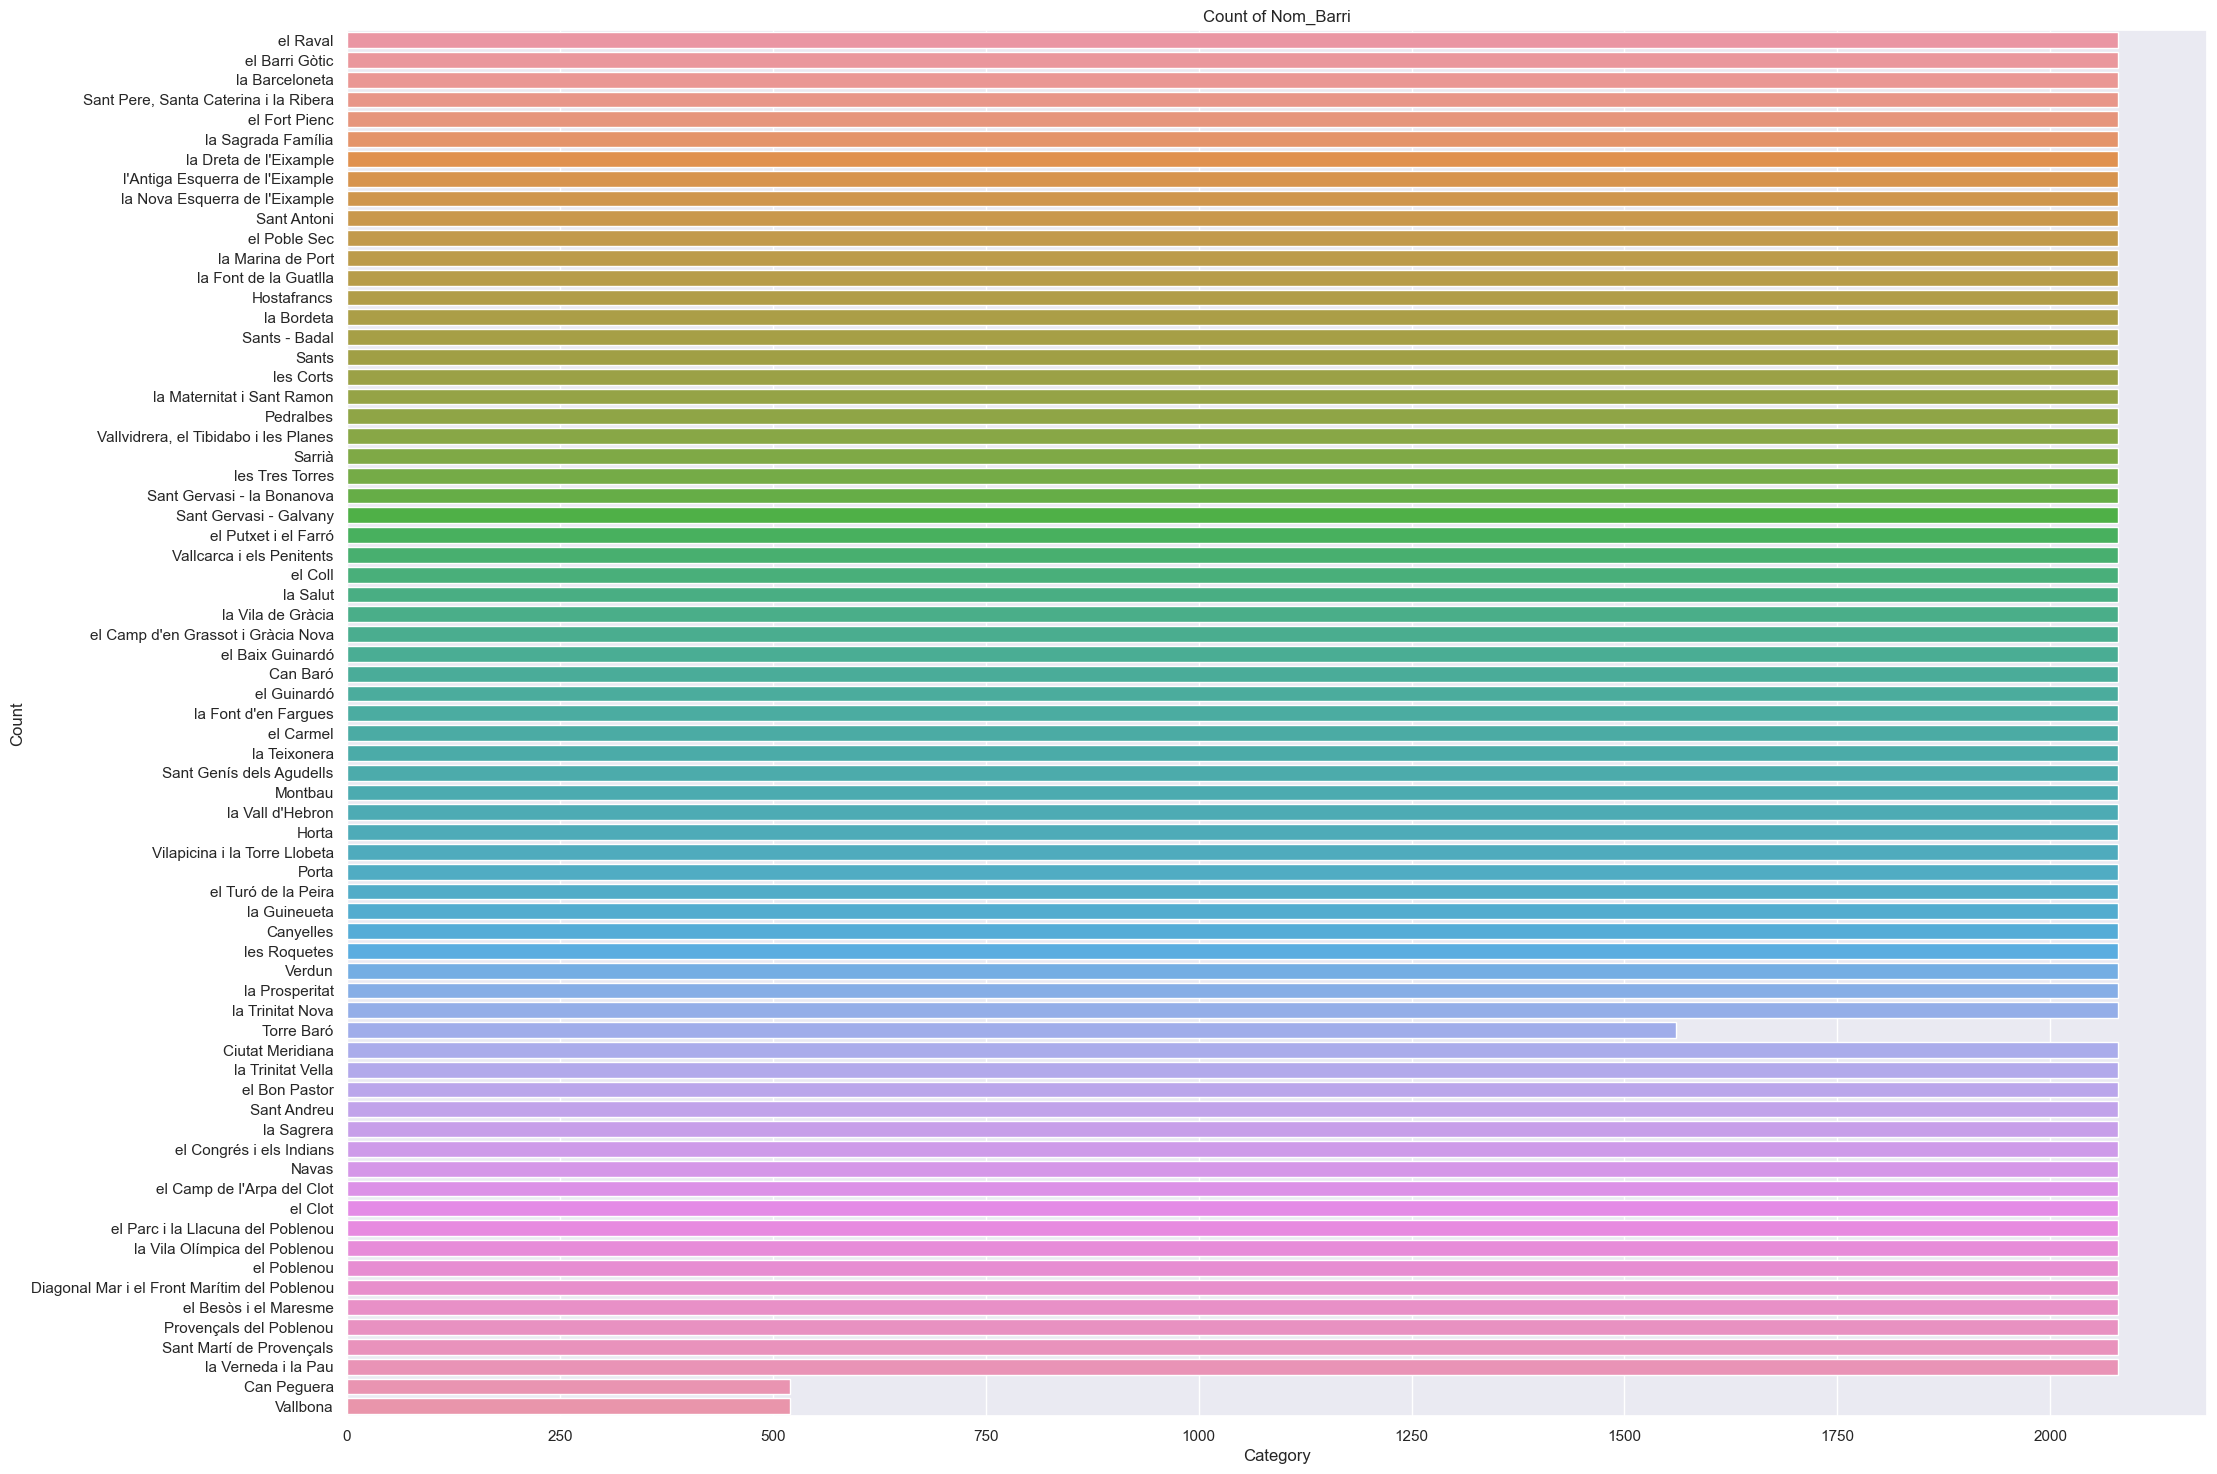

In [57]:
# Call the function to create the countplot
plot_countplot(df, column='Nom_Barri', title='Count of Nom_Barri', xlabel='Category', ylabel='Count', horizontal=True)

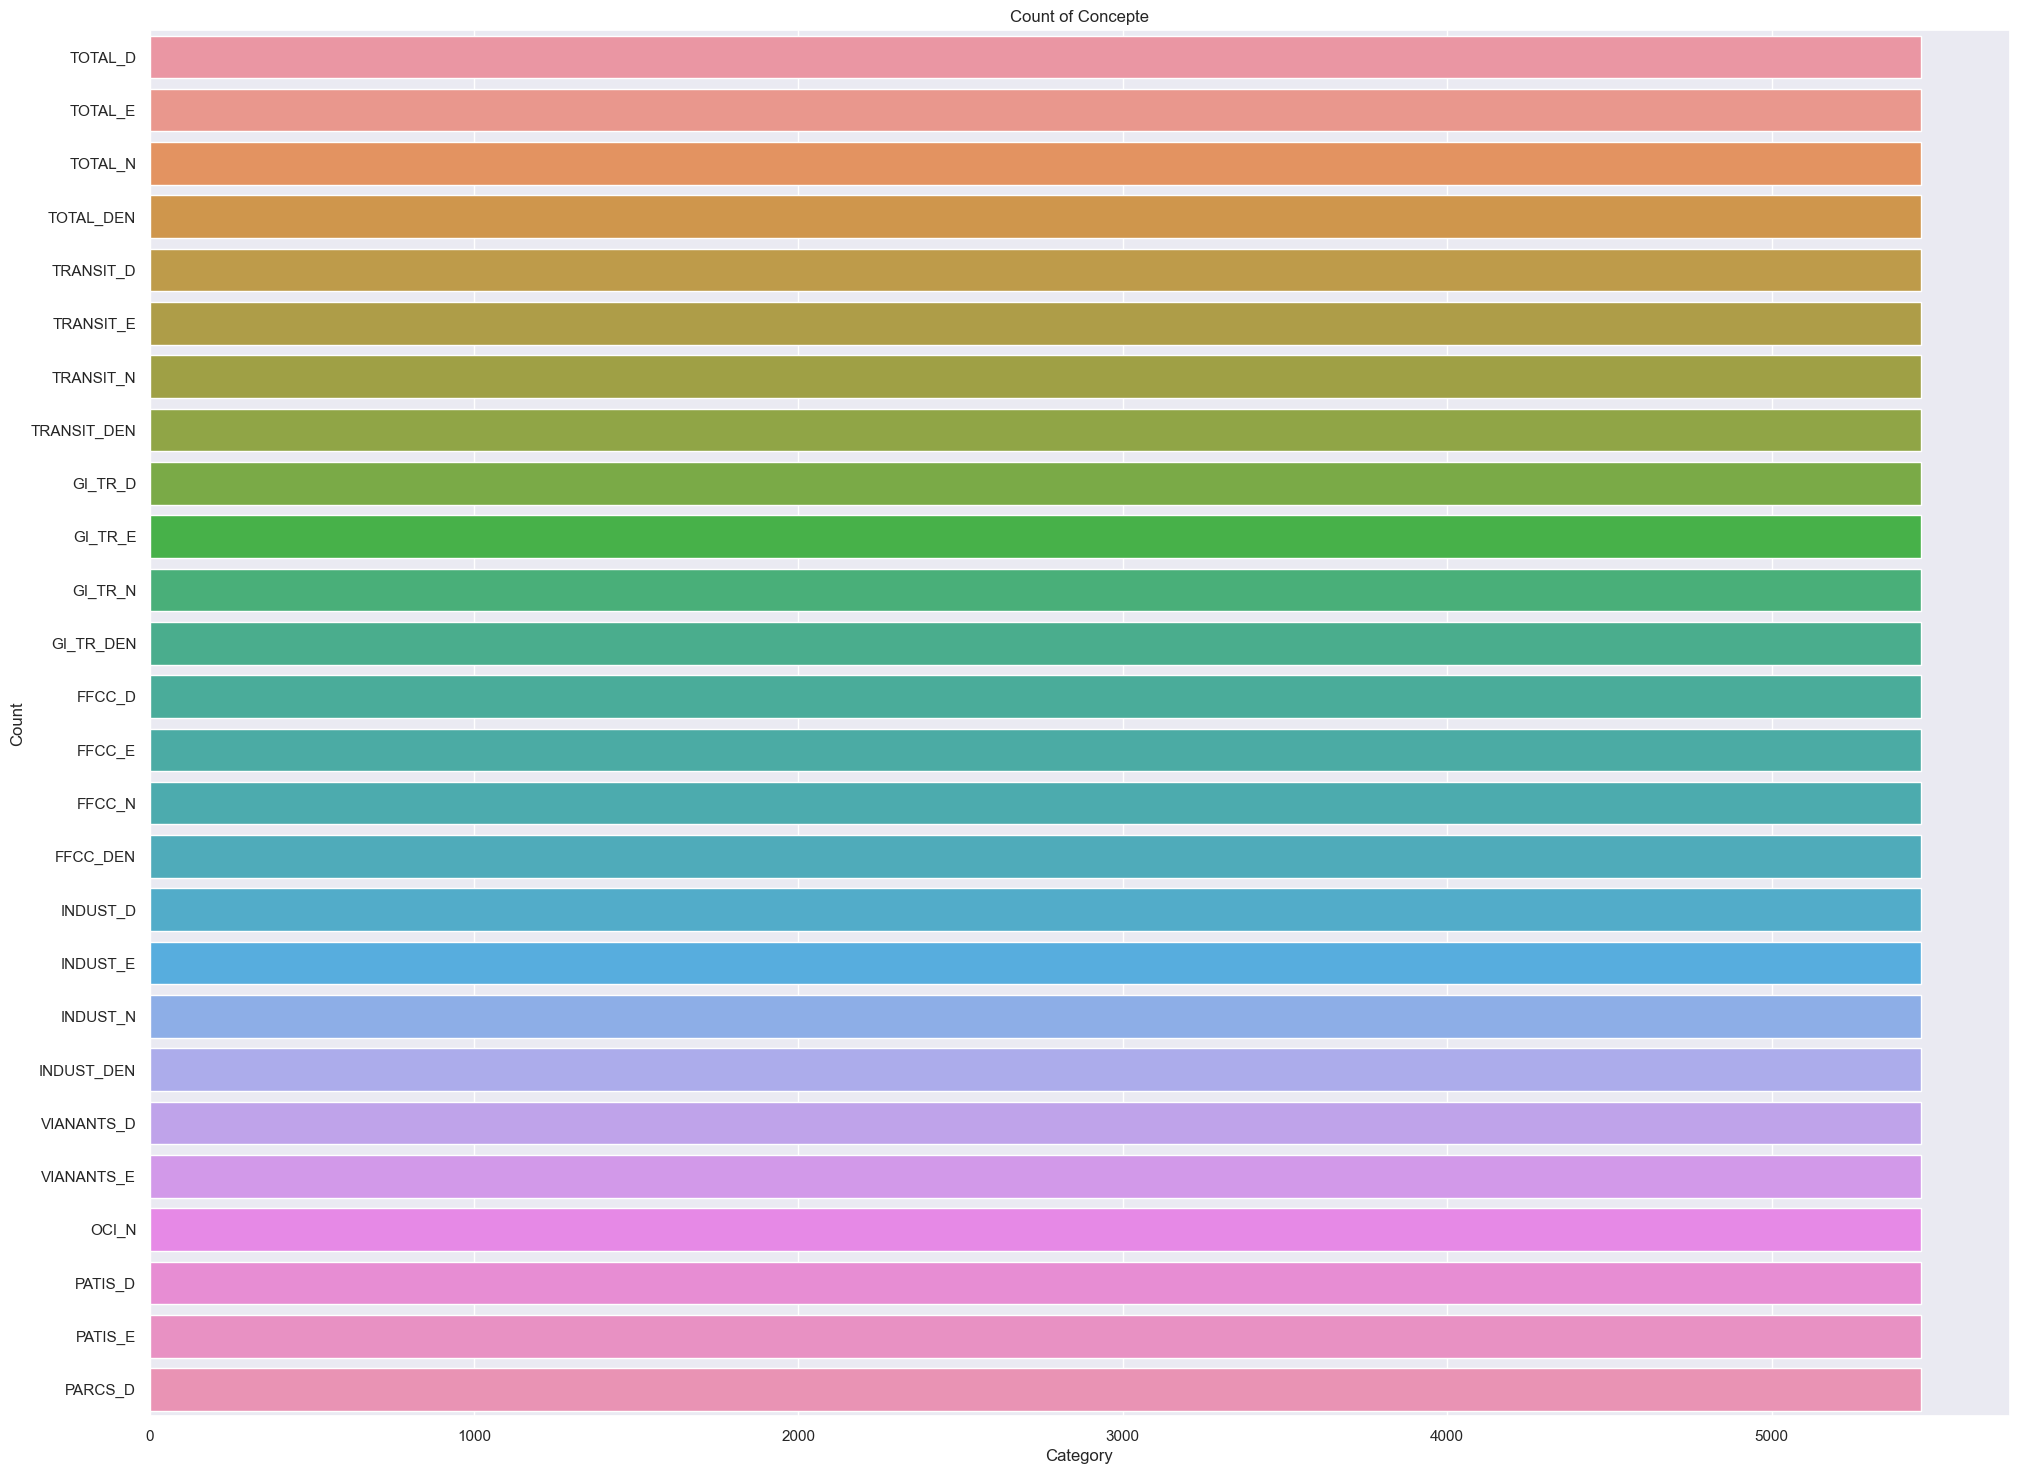

In [58]:
# Call the function to create the countplot
plot_countplot(df, column='Concepte', title='Count of Concepte', xlabel='Category', ylabel='Count', horizontal=True)

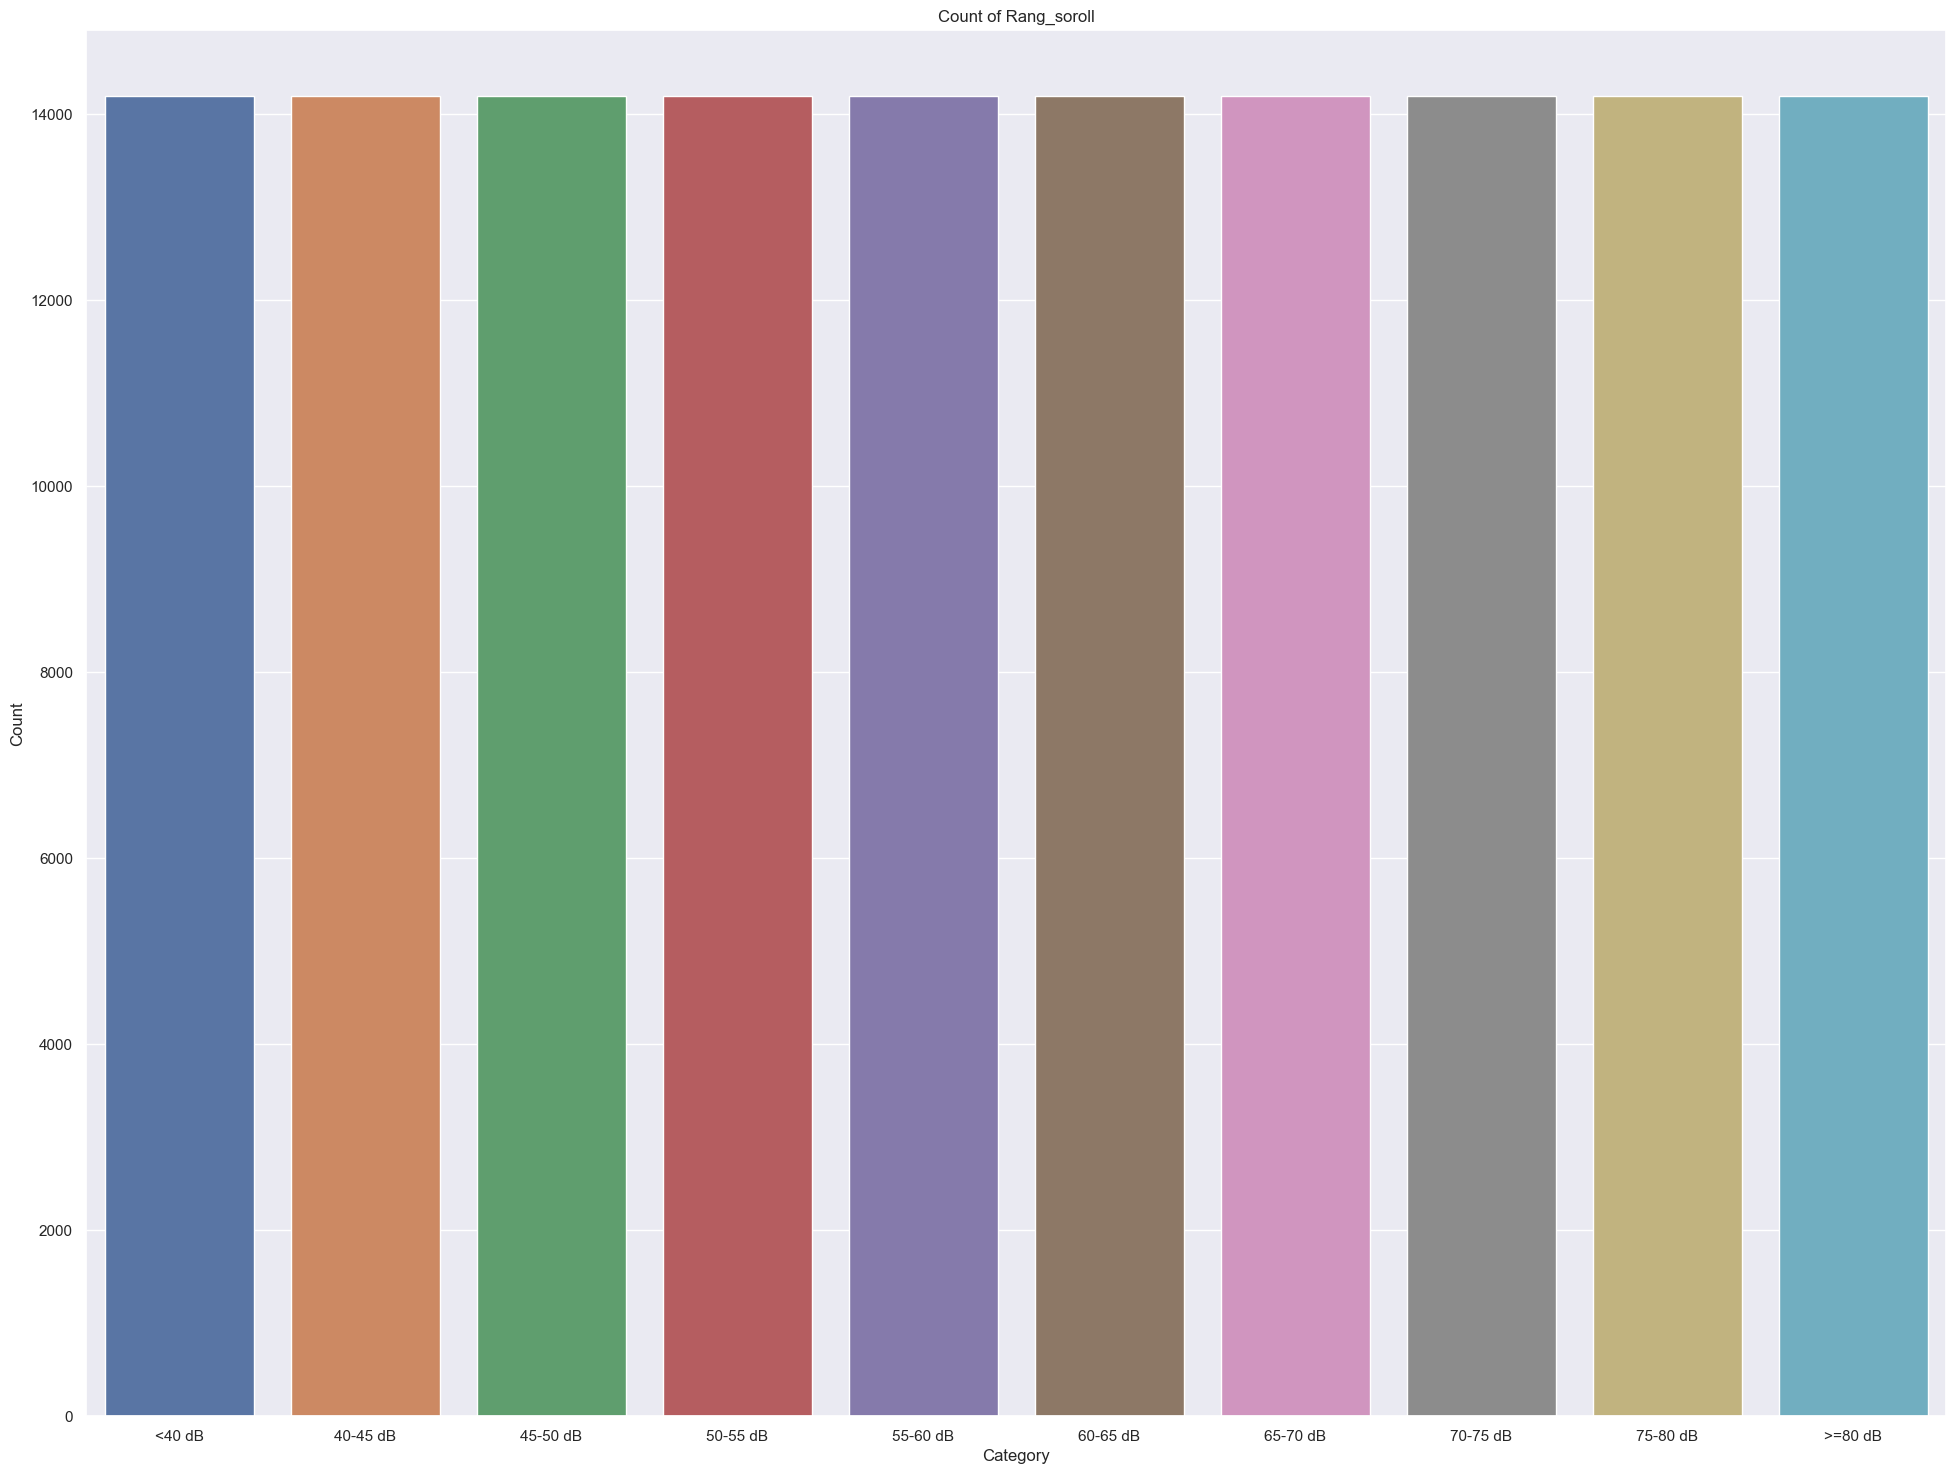

In [59]:
# Call the function to create the countplot
plot_countplot(df, column='Rang_soroll', title='Count of Rang_soroll', xlabel='Category', ylabel='Count')

In [82]:
# Now let's evaluate the numerical variables. From the graphs plotted above, 
# one may conclude that the data is uniformly distributed

In [61]:
df.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu', 'Concepte', 'Rang_soroll',
       'Valor'],
      dtype='object')

In [62]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73%
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98%
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38%
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97%
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85%


In [63]:
def reg_sug(value):
    return re.sub("%", "", str(value))

In [64]:
df['Valor'] = df['Valor'].apply(reg_sug)
df["Valor"] = df["Valor"].astype(float)

##### Bivariate Analysis

In [65]:
# Corr between numerical variables
df["Preu"] = df["Preu"].astype(float)

In [66]:
# Calculate the correlation between 'Variable1' and 'Variable2'
correlation = df['Preu'].corr(df['Valor'])

print(f"Correlation between Preu and Valor: {correlation}")

Correlation between Preu and Valor: -5.5055406453653405e-19


In [67]:
def plot_boxplot(data, x_column, y_column, title='', xlabel='', ylabel='', figsize=(24, 18)):
    """
    Create a boxplot using Seaborn.

    Parameters:
    - data: DataFrame containing the data to be plotted.
    - x_column: Name of the column to be used for the x-axis.
    - y_column: Name of the column to be used for the y-axis.
    - title: Title of the plot (optional).
    - xlabel: Label for the x-axis (optional).
    - ylabel: Label for the y-axis (optional).
    - figsize: Figure size (optional).

    Returns:
    - None (displays the plot).
    """
    plt.figure(figsize=figsize)
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

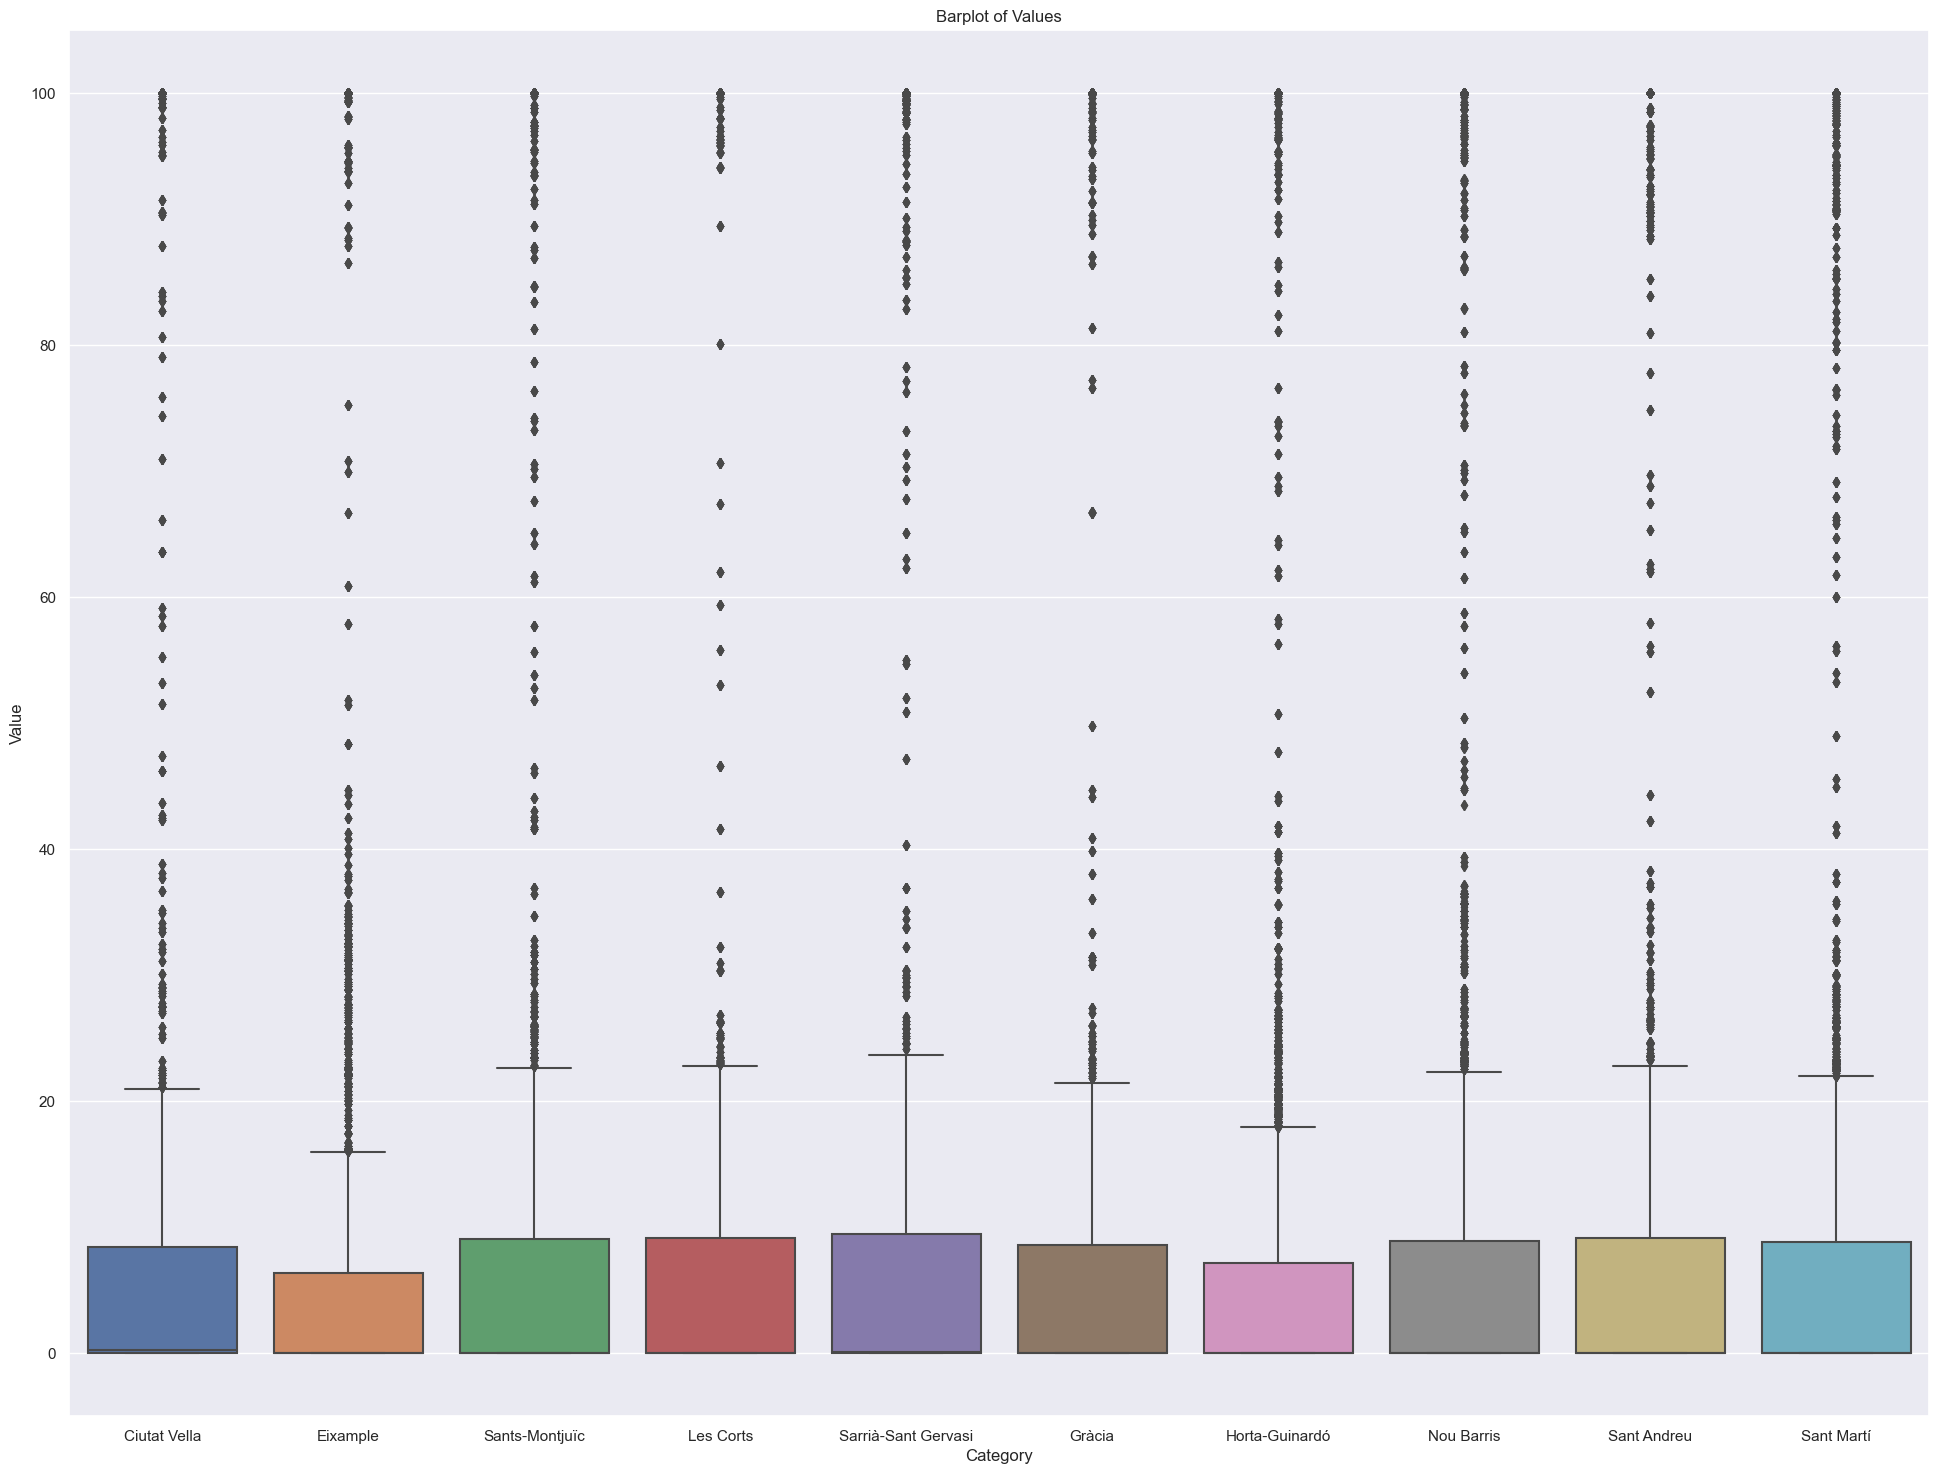

In [68]:
# Create a horizontal barplot using the modified function
plot_boxplot(df, x_column='Nom_Districte', y_column='Valor', title='Barplot of Values', xlabel='Category', ylabel='Value')

In [ ]:
# Let's try to manually check if we have seasonality in the noise

In [69]:
# Group by 'Trimestre' and calculate the mean 'Valor' for each 'district'
tmp_df = df.groupby(['Nom_Districte', 'Trimestre'])['Valor'].mean().reset_index()

# Rename the 'noise' column to 'mean_noise'
tmp_df = tmp_df.rename(columns={'Valor': 'mean_noise'})

# Display the resulting DataFrame
tmp_df

,Nom_Districte,Trimestre,mean_noise
0,Ciutat Vella,1,10.0
1,Ciutat Vella,2,10.0
2,Ciutat Vella,3,10.0
3,Ciutat Vella,4,10.0
4,Eixample,1,10.0
5,Eixample,2,10.0
6,Eixample,3,10.0
7,Eixample,4,10.0
8,Gràcia,1,10.0
9,Gràcia,2,10.0


##### OHE and Normalization

In [70]:
df.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu', 'Concepte', 'Rang_soroll',
       'Valor'],
      dtype='object')

In [71]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85


In [72]:
categorical_cols = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Concepte', 'Rang_soroll']
numeric_cols = ['Preu', 'Valor']

In [73]:
# One-Hot Encoding (OHE) for categorical columns
ohe = OneHotEncoder(sparse=False, drop=None)  # Use drop=None to keep all categories

ohe_transformed = ohe.fit_transform(df[categorical_cols])
ohe_columns = ohe.get_feature_names(categorical_cols)
ohe_df = pd.DataFrame(ohe_transformed, columns=ohe_columns)

C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
# Normalization using MinMaxScaler for numeric columns. We have to make all the values range between
# 0 and 1 to have the same scale.
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df[numeric_cols])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

In [75]:
# Concatenate the OHE and normalized DataFrames
result_df = pd.concat([ohe_df, normalized_df], axis=1)

<!-- # # Create a k-NN imputer
# knn_imputer = KNNImputer(n_neighbors=3)  -->

<!-- # Apply the imputer to the entire DataFrame
imputed_data = knn_imputer.fit_transform(result_df) -->

<!-- # Create a new DataFrame with imputed values
result_df = pd.DataFrame(result_df, columns=result_df.columns) -->

##### Applying the PCA

In [76]:
# No we apply PCAA
pca = PCA()
principal_components = pca.fit_transform(result_df)

In [77]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [78]:
# Interpretation of components
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=result_df.columns)

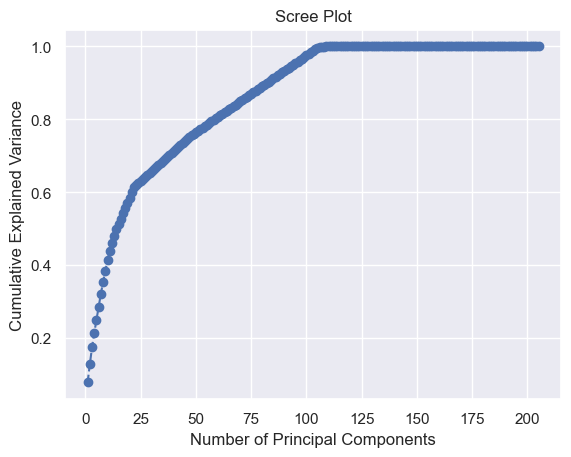

In [79]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [80]:
# Dimensionality reduction
num_components_to_keep = 100 # As we can see from the above graph, we can divide
# by two the number of components
reduced_data = pd.DataFrame(principal_components[:, :num_components_to_keep])

In [81]:
reduced_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.726846,-0.061225,0.007033,0.245899,-0.278418,0.789063,-0.221126,-0.123597,0.019485,-4.208969e-17,...,-0.000000e+00,-0.000000e+00,3.901423e-26,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,0.726846,-0.061225,0.007033,0.245899,-0.278418,0.789063,-0.221126,-0.123597,0.019485,1.428009e-12,...,1.479043e-14,-7.331956e-15,6.219783e-15,-2.374380e-15,-3.326503e-15,-7.550341e-15,-2.272875e-15,-2.247514e-15,1.328239e-14,-1.591418e-14
2,0.726846,-0.061225,0.007033,0.245899,-0.278418,0.789063,-0.221126,-0.123597,0.019485,-2.023711e-13,...,9.555265e-15,1.808343e-14,2.345459e-14,1.978625e-15,-2.642703e-14,-3.974745e-15,-2.505551e-15,1.085605e-14,-1.646359e-14,9.140877e-15
3,0.726846,-0.061225,0.007033,0.245899,-0.278418,0.789063,-0.221126,-0.123597,0.019485,-4.564977e-13,...,-5.123975e-15,6.749122e-15,1.553897e-14,-2.170791e-15,-1.146930e-14,-1.877771e-15,4.955933e-16,6.828336e-15,1.727202e-14,-2.214838e-15
4,0.726846,-0.061225,0.007033,0.245899,-0.278418,0.789063,-0.221126,-0.123597,0.019485,-7.340727e-13,...,-8.251733e-15,2.477658e-14,-1.766435e-15,-1.513384e-15,8.814102e-15,3.006168e-15,-5.576700e-15,-1.134538e-14,3.456347e-15,7.825739e-15


In [ ]:
# We basically reduced the number of components from 200 to 100. Since we were working with a high 
# Cardinality Dataset, it was important to reduce the number of features to make the data less complex. 